PRACTICAL 1

---



In [ ]:
from IPython.display import display
from PIL import Image

In [ ]:
import tensorflow as tf
(x_train , y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Above statement imports and loads the MNIST dataset from the net
# x_train has 60000 image samples, x_test has 10000 image samples

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython

8


TypeError: ignored

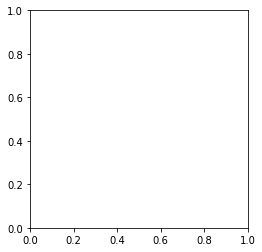

In [ ]:
image_index = 4578 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
# Compiling and fitting the model
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs = 10)
#Evaluating the Model
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2078 - accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0829 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0336 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0208 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0211 - accuracy: 0.9925
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

[0.07364551723003387, 0.9821000099182129]

The character is 
5


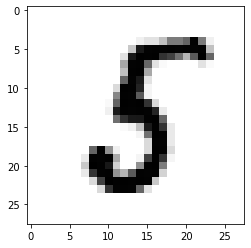

In [ ]:
# Making individual predivtions
image_index = 5020
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The character is ')
print(pred.argmax())